Logistic Regression - Gradient Descent
--
In this part you will build a logistic regression model using Numpy and doing gradient descent. 
You should complete the following cells (those with comments and no code). 

In [189]:
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# read data
import pandas as pd
from sklearn.preprocessing import add_dummy_feature

data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/exams_admitted.csv')
print(data.head())

       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [191]:
# extract X and y from data
# use features 'exam1' and 'exam2' for X
# use feature 'admitted' for y
# use pandas.DataFrame.values to convert to numpy arrays
X = data[['exam1', 'exam2']].values
y = data[['admitted']].values

print(X)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

In [192]:
# normalize X
# use scikit-learn's built-in function MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X[0])

[0.06542784 0.69465488]


In [193]:
# add a dummy feature for the intercept
# use scikit-learn's built-in function add_dummy_feature
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(X)
print(X[0])

[1.         0.06542784 0.69465488]


In [194]:
# set m (number of training examples) and n (number of features)
# use the shape attribute of X

m=X.shape[0]
n=X.shape[1]

m,n

(100, 3)

In [195]:
# initialize theta to zeros
# the theta array should be number of features plus one

theta = np.zeros((n,1)) # this is number of features plus one cause we dont count dummy i think
theta

array([[0.],
       [0.],
       [0.]])

In [196]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1+np.exp(-z))


# test your sigmoid function on the value 0, should return 0.5
sigmoid(0)



0.5

In [197]:
# create a hypothesis function called h that takes in: 
# theta, an instance x, and returns the hypothesis
# the hypothesis is the sigmoid of x@theta
# use the @ operator for matrix multiplication

print(theta)

def h(theta,x):
    return sigmoid(x@theta)

print(X[0])

# test your hypothesis function on the first instance of X, should return [[0.5]]
print(h(theta,X[0]))


# the above function is vectorized
# for example, if instead of a single instance x, we have a matrix X of shape (m,n)
# then the hypothesis is a vector of shape (m,1) 
# where each element is the hypothesis for the corresponding row of X
# test it on the first 5 instances of X, should return an array of 0.5's

h(theta,X[:5])




[[0.]
 [0.]
 [0.]]
[1.         0.06542784 0.69465488]
[0.5]


array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [198]:
import numpy as np
# create a function called J that takes in theta, X, y, and returns the cost
# the cost is the average of the log loss over the training examples
# the log loss for a single example is -y*log(h(theta,x))-(1-y)*log(1-h(theta,x))
# the cost is the average of the log loss over the training examples
# use the np.mean function to compute the average
# use the np.log function to compute the log
# use the @ operator to compute matrix multiplication
# use a vectorized implementation, do not use a for loop over the training examples
# use the hypothesis function h defined above




def J(theta,X,y):
    one_c = -y*np.log(h(theta,X))-(1-y)*np.log(1-h(theta,X))
    aver = np.mean(one_c)
    #print(one_c)
    #print(aver)
    return aver



#test your cost function on the initial all-zero theta, should return 0.6931471805599453
J(theta,X,y)


0.6931471805599453

In [199]:
# create a function called gradient that takes in theta, X, y, and returns the gradient
# the gradient is the average of the gradient over the training examples
# use the hypothesis function h defined above
# use a vectorized implementation, do not use a for loop over the training examples
# use the @ operator to compute matrix multiplication
# use the np.mean function to compute the average
# use the formula for the gradient given in the lecture
# the vectorized formula is X.T@(h(theta,X)-y)/m

# test your gradient function on the initial theta 

def gradient(theta, X, y):
    grad = X.T@(h(theta,X)-y)/m
   # print(grad)
    return grad

gradient(theta,X,y)

array([[-0.1       ],
       [-0.12904484],
       [-0.12015491]])

In [200]:
# create a function called 'fit' that takes in: 
# X, y, alpha, num_iters, initial theta, 
# and returns: final theta, and J_history
# inside the function:
# initialize theta to the initial theta
# initialize J_history to an empty list
# for each iteration, using a for loop over num_iters:
# update theta by subtracting alpha times the gradient (using the gradient function defined above)
# compute the cost J using the cost function defined above and append it to J_history
# return final theta, and J_history

def fit(X,y,alpha,num_iters,initial_theta):
    theta = initial_theta
    J_history = []
    for q in range(0, num_iters):
        theta = theta - (alpha * gradient(theta, X, y))
        #print(theta)
        j = J(theta, X, y)
        J_history.append(j)
    final_theta = theta
    #print(final_theta, J_history)
    return final_theta, J_history

#fit(X,y,0.1,10000,np.zeros((n,1)))


# create a function called predict that takes in: 
# theta, and an array X_new of instances, 
# and returns the predictions
# threshold the hypothesis at 0.5
# use the hypothesis function h defined above

def predict(theta, X_new):
    predictions = h(theta, X_new[0])
    print(predictions)
    


Text(0, 0.5, 'J')

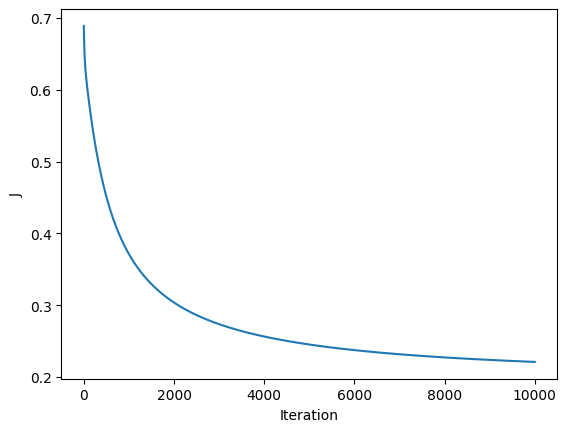

In [201]:
# call fit() with the following arguments:
# X, y, alpha=0.1, num_iters=10000, initial_theta=np.zeros((n,1))
# store the returned values in theta, J_history
# uncomment the following line to call fit()


theta, J_history = fit(X, y, alpha=0.1, num_iters=10000, initial_theta=np.zeros((n,1)))

# plot the cost over the iterations stored in J_history
# you should see the cost decreasing
# uncomment the following lines to plot the cost

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('J')

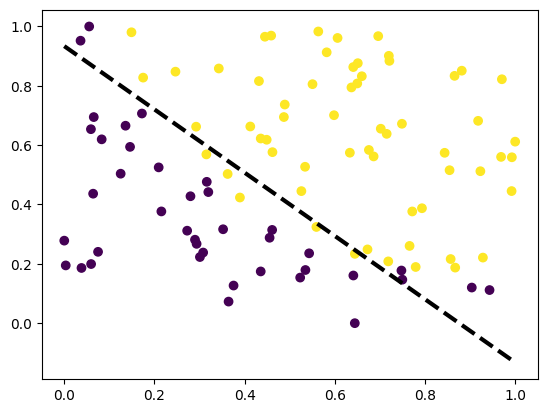

In [202]:
# plot the data points
# use a scatter plot
# use the first feature for the x-axis, the second feature for the y-axis
# use the actual labels for the color, c=y[:,0]
# uncomment the following line to plot the data points
plt.scatter(X[:,1],X[:,2],c=y[:,0])



# plot the decision boundary
# the decision boundary is the line where the hypothesis is 0.5
# the hypothesis is 0.5 when x@theta=0
# so the decision boundary is the line where x@theta=0
# this is a line in the x1,x2 plane

# for plotting the decision boundary, we need two points
# create two x1 values, say 0 and 1 (since we scaled to [0,1])
# then calculate the corresponding x2 values 
# using the decision boundary equation
# uncomment the following lines to plot the decision boundary
two_x1 = np.array([0, 1])
two_x2 = -(theta[0] + theta[1] * two_x1) / theta[2]

# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)